<a href="https://colab.research.google.com/github/shiv9thakur/Arya_Assessment/blob/main/Assignment_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment

##Objective
To perform binary classification. After data processing, EDA, and feature selection to training a model classifying the data into class '0' or class '1'.


##Importing the Data

The data is provide by the folks at Arya.ai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
path = '/content/drive/MyDrive/Arya_DataScientist_Assignment/training_set.csv'

df = pd.read_csv(path)

##Data preprocessing

The data consisted of 57 features without any discriptive names and almost consisted of float data types with a couple of integer types. There was not much cleansing needed. After removing the index column, we moved on to EDA

In [ ]:
df.sample(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
2664,2664,0.46,0.33,0.2,0.0,0.13,0.53,0.06,0.2,0.0,...,0.012,0.038,0.000,0.410,0.192,0.115,4.754,268,813,1
2700,2700,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,1.545,6,17,0
1911,1911,0.00,0.00,0.0,0.0,0.00,0.41,0.00,0.0,0.0,...,0.199,0.530,0.331,0.199,0.000,0.000,5.019,18,261,1


In [ ]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0      int64
X1            float64
X2            float64
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9            float64
X10           float64
X11           float64
X12           float64
X13           float64
X14           float64
X15           float64
X16           float64
X17           float64
X18           float64
X19           float64
X20           float64
X21           float64
X22           float64
X23           float64
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
X30           float64
X31           float64
X32           float64
X33           float64
X34           float64
X35           float64
X36           float64
X37           float64
X38           float64
X39           float64
X40           float64
X41           float64
X42           float64
X43           float64
X44           float64
X45       

In [4]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Y             0
dtype: int64

In [ ]:
df = df.drop("Unnamed: 0", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


##EDA 

Since the data wasn't discriptive, I proceeded with plotting the correlation of the features. It let to the fact that barring 4, there wasn't much of a significant influence features had on the dependent variable. However there were too many features with not much of a relation with the target variable and hence I decided to approach with 40 most influential features to build prediction model. For that I employed that use of tree based classifier.

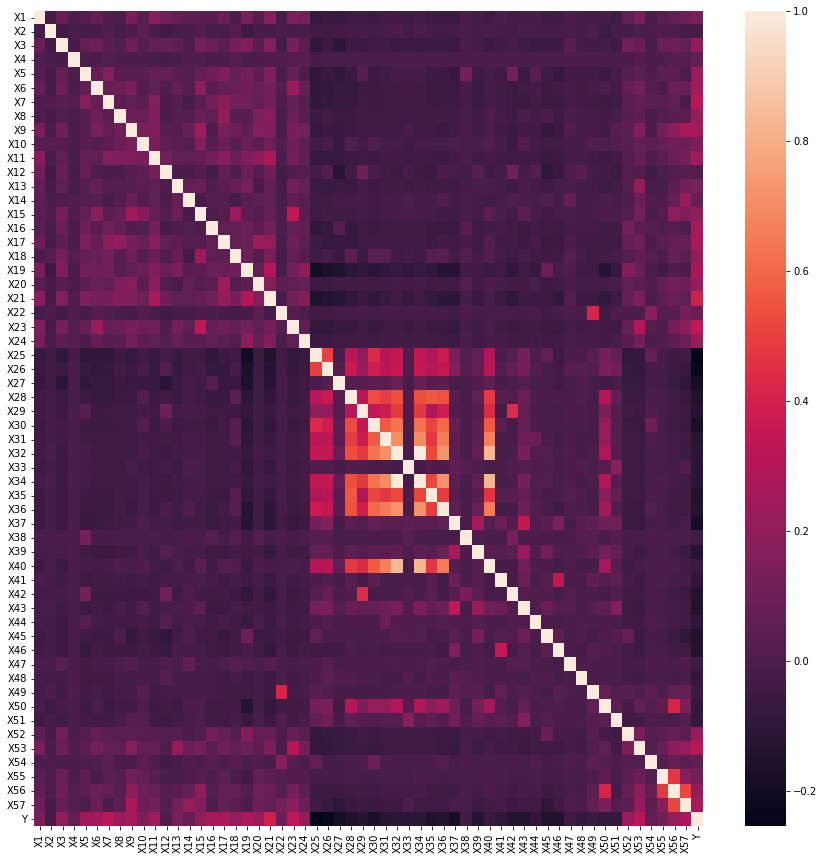

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr())

In [ ]:
df.groupby('Y').describe()

X1                                                     X2            \
    count      mean       std  min  25%  50%   75%   max   count      mean   
Y                                                                            
0  2376.0  0.072088  0.296149  0.0  0.0  0.0  0.00  4.34  2376.0  0.233089   
1  1534.0  0.150854  0.290259  0.0  0.0  0.0  0.17  2.43  1534.0  0.165111   

   ...   X56             X57                                            \
   ...   75%     max   count        mean         std  min   25%    50%   
Y  ...                                                                   
0  ...  18.0  1488.0  2376.0  157.410354  347.099343  1.0  18.0   55.0   
1  ...  83.0  9989.0  1534.0  477.675359  777.086681  2.0  92.0  198.0   

                    
      75%      max  
Y                   
0  140.25   5902.0  
1  535.75  10062.0  

[2 rows x 456 columns]

In [ ]:
print((1534/3910) * 100, "%")

39.232736572890026 %


[0.00854793 0.01251561 0.02516644 0.00259805 0.03258346 0.01725531
 0.051882   0.01714207 0.02055456 0.00984452 0.02520348 0.01452589
 0.00756323 0.00467172 0.00847771 0.0440038  0.0199464  0.01544099
 0.03834081 0.01657122 0.0684167  0.00588986 0.04121657 0.025338
 0.04076386 0.01797683 0.02933167 0.01014997 0.00577395 0.00841734
 0.00492609 0.00274922 0.00656108 0.00191335 0.00393825 0.00644189
 0.01568816 0.00159606 0.00623882 0.00310442 0.00327548 0.01190426
 0.00465203 0.00552769 0.01604844 0.01861546 0.00098447 0.00283899
 0.0078838  0.01393652 0.00485091 0.04748131 0.04787854 0.00601678
 0.03411412 0.03880838 0.03591552]


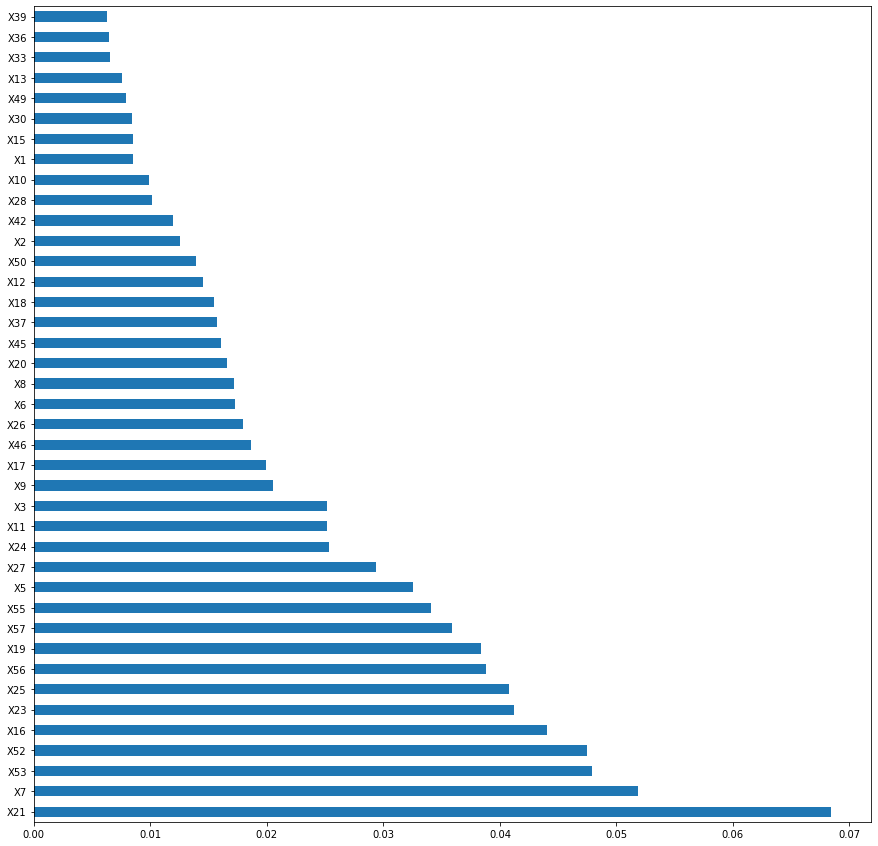

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
X = df.iloc[:,0:57]  #independent columns
y = df.iloc[:,-1]    #target column

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

##Feature Selection and Splitting Data

As above mentioned the 40 selected features were drained out of the dataframe to create the training data and was then splitting into 4:1 test-train ratio as per team recommendation.

In [ ]:
feature = pd.DataFrame(feat_importances.nlargest(40))

In [ ]:
feature.index

Index(['X21', 'X7', 'X53', 'X52', 'X16', 'X23', 'X25', 'X56', 'X19', 'X57',
       'X55', 'X5', 'X27', 'X24', 'X11', 'X3', 'X9', 'X17', 'X46', 'X26', 'X6',
       'X8', 'X20', 'X45', 'X37', 'X18', 'X12', 'X50', 'X2', 'X42', 'X28',
       'X10', 'X1', 'X15', 'X30', 'X49', 'X13', 'X33', 'X36', 'X39'],
      dtype='object')

In [ ]:
X = df[feature.index]

In [ ]:
X.sample

<bound method NDFrame.sample of        X21    X7    X53    X52   X16   X23    X25  X56   X19  X57  ...  X28  \
0     0.00  0.00  0.000  1.342  0.00  0.00   0.00    2  0.00   12  ...  0.0   
1     1.12  2.25  0.000  0.503  0.00  0.00   0.00  148  3.38  375  ...  0.0   
2     0.00  0.00  0.000  0.000  0.00  0.00   0.00    1  8.10    5  ...  0.0   
3     2.58  0.00  0.370  0.462  1.29  0.64   0.00   22  1.93  122  ...  0.0   
4     1.74  0.58  0.239  0.239  0.58  0.00   0.00  123  0.58  207  ...  0.0   
...    ...   ...    ...    ...   ...   ...    ...  ...   ...  ...  ...  ...   
3905  0.00  0.00  0.000  0.000  0.00  0.00   0.00    4  7.31   12  ...  0.0   
3906  0.00  0.00  0.000  0.000  0.00  0.00  18.18    3  0.00    4  ...  0.0   
3907  0.51  0.00  0.000  0.023  0.12  0.00   0.00    5  2.19  131  ...  0.0   
3908  0.00  0.00  0.198  0.198  0.00  0.00   0.00   25  0.00   81  ...  0.0   
3909  0.96  0.00  0.467  0.175  0.48  0.00   0.00  259  0.00  717  ...  0.0   

       X10    X1   

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Y'], test_size=0.2)

##Model building

To perform binary classification with 40 features, the approach necessitates Logistic Regression, Support Vector Machine or Artificial Neural Network. However, I preferred not to use SVM classifier due to its time consuming nature and being heavy on the GPU. I instead went with LR and ANN for building the model simply for there relative speed. 

After experimenting with Various combinations of Neural networks,-with and without drop layers- the F1 score of the ANN and LR were relatively same.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Logistic Regression
clf = LogisticRegression(max_iter = 2000, random_state=0).fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred_lr))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       481
           1       0.90      0.89      0.89       301

    accuracy                           0.92       782
   macro avg       0.92      0.91      0.91       782
weighted avg       0.92      0.92      0.92       782



In [ ]:
#Artificial Neural Network
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
                            keras.layers.Dense(40, input_dim = 40, activation='relu'),
                            keras.layers.Dense(30, activation='relu'),
                            keras.layers.Dense(15, activation='relu'),
                            keras.layers.Dense(7, activation='relu'),
                            keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

  if weights == -1:
    model.fit(X_train, y_train, epochs = 50)
  else:
    model.fit(X_train, y_train, epochs = 50, class_weights = weights)
  
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 0.7849 - accuracy: 0.6877
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.8213
Epoch 3/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.8475
Epoch 4/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.8462
Epoch 5/50
98/98 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.8753
Epoch 6/50
98/98 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.8772
Epoch 7/50
98/98 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8983
Epoch 8/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.9038
Epoch 9/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.8871
Epoch 10/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2868 - accuracy: 0.8999
Epoch 11/50
98/98 [

In [ ]:
test_path = "/content/drive/MyDrive/Arya_DataScientist_Assignment/test_set.csv"

df_test = pd.read_csv(test_path)

In [ ]:
df_test = df_test.drop("Unnamed: 0", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.sample(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
530,0.86,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,...,0.86,0.561,0.14,0.0,0.000,0.000,0.000,1.352,6,23
156,0.00,0.29,0.72,0.0,0.29,0.0,0.14,0.0,0.0,0.43,...,0.00,0.000,0.00,0.0,0.865,0.023,0.046,5.133,132,1001


##Prediction

ANN_prediction and LR_prediction are the two results saved below as the results of the binary classification assessment.

In [ ]:
Xt = df_test[feature.index]

In [ ]:
def predANN(X_train, y_train, X_test, y_test, Xt, loss, weights):
  model = keras.Sequential([
                            keras.layers.Dense(40, input_dim = 40, activation='relu'),
                            keras.layers.Dense(30, activation='relu'),
                            keras.layers.Dense(15, activation='relu'),
                            keras.layers.Dense(7, activation='relu'),
                            keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

  if weights == -1:
    model.fit(X_train, y_train, epochs = 50)
  else:
    model.fit(X_train, y_train, epochs = 50, class_weights = weights)
  
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  prediction = model.predict(Xt)

  return prediction 

In [ ]:
prediction = predANN(X_train, y_train, X_test, y_test, Xt, 'binary_crossentropy', -1)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 1.0263 - accuracy: 0.5786
Epoch 2/50
98/98 [==============================] - 0s 5ms/step - loss: 0.6465 - accuracy: 0.6976
Epoch 3/50
98/98 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.7088
Epoch 4/50
98/98 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.7708
Epoch 5/50
98/98 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8226
Epoch 6/50
98/98 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.7944
Epoch 7/50
98/98 [==============================] - 0s 5ms/step - loss: 0.3815 - accuracy: 0.8290
Epoch 8/50
98/98 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.8641
Epoch 9/50
98/98 [==============================] - 0s 5ms/step - loss: 0.3351 - accuracy: 0.8561
Epoch 10/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.7928
Epoch 11/50
98/98 [

In [ ]:
ANN_prediction = prediction

In [ ]:
LR_prediction = clf.predict(Xt)

In [ ]:
df.sample(1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3043,0.0,0.0,0.46,0.0,1.39,0.0,0.93,0.93,0.0,0.0,...,0.069,0.0,0.0,0.0,0.0,0.069,1.442,8,75,1
